In [1]:
# 1 plot the lm vs wlm
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import time

#import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#import imutils
import matplotlib.image as mpimg
from collections import OrderedDict
import pandas as pd

from skimage import io, transform
from math import *
import xml.etree.ElementTree as ET 
import pandas as pd
from skimage.transform import AffineTransform, warp
from skimage.transform import rotate as rotate_transform
from skimage.util import random_noise
from skimage.filters import gaussian
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pickle

/Users/dylan.geldenhuys/.pyenv/versions/3.9.0/envs/tsetse_plos/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

'''
You instantiate it with the same arguments used for the normalize. and then use it the same way

unorm = UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
unorm(tensor)

'''

class resnet50(nn.Module):
    def __init__(self,num_classes=22):
        super().__init__()
        self.model_name='resnet50'
        self.model=models.resnet50(pretrained=True)
        self.model.conv1=nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.model.fc=nn.Linear(self.model.fc.in_features, num_classes)
        
    def forward(self, x):
        x=self.model(x)
        return x

        
network = resnet50()
network.load_state_dict(torch.load('C:/Projects/msc_haar/manuscript1_exp/regressors/models/model_resnet50_regressor_finetune___.pth'))
network.cuda()
network.eval()

resnet50(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [2]:

import pandas as pd
data = pd.read_csv("/Users/dylan.geldenhuys/mlc/tsetse_plos/Landmark-detection-for-tsetse-fly-wings/manuscript1_exp/Pipeline/Results/Results_2021_03_28/final_clean.csv", index_col = 0)
data = data[data.hc==0]
data = data.reset_index(drop=True)
data

,vpn,cd,cm,cy,md,g,s,c,wlm,f,...,r_x8,r_y8,r_x9,r_y9,r_x10,r_y10,r_x11,r_y11,dis_l,dis_r
0,20000101,4,November,94,Odour-baited trap,Gp,2,1.0,732,3,...,567.407898,690.841309,1008.238159,405.378510,624.709961,468.400269,893.093994,364.388000,1037.957322,1039.492698
1,20000102,4,November,94,Odour-baited trap,Gp,2,5.0,732,4,...,542.927429,728.493164,947.673096,387.652985,552.256104,514.420044,824.600769,366.947876,1050.851960,1052.572986
2,20000103,4,November,94,Odour-baited trap,Gp,2,5.0,723,5,...,650.182434,724.347778,1017.349243,368.749390,656.613281,505.309296,898.226379,349.583191,1019.754228,1015.082370
3,20000104,4,November,94,Odour-baited trap,Gp,2,4.0,732,5,...,570.792053,730.368652,940.993774,353.971252,582.796387,498.054413,822.565796,341.588074,1047.866079,1028.499505
4,20000105,4,November,94,Odour-baited trap,Gp,2,7.0,713,3,...,586.255554,719.888794,927.340332,345.240295,574.275330,508.584442,811.252502,337.807953,1024.401362,1013.314764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14272,21077806,21,July,96,Odour-baited trap,Gp,2,0.0,771,1,...,605.018188,769.036926,1063.527832,438.907074,645.663330,531.761475,934.227295,407.265564,1106.027327,1102.717448
14273,21077807,21,July,96,Odour-baited trap,Gp,2,2.0,752,3,...,558.620972,745.570129,1010.128479,422.642853,601.183533,511.324036,882.647705,390.960999,1100.293645,1074.980049
14274,21077808,21,July,96,Odour-baited trap,Gp,2,2.0,752,2,...,625.724670,720.502808,1057.525879,427.054657,671.801880,503.216705,934.443054,393.638123,1050.279378,1044.738027
14275,21077809,21,July,96,Odour-baited trap,Gp,2,1.0,761,2,...,556.815125,742.536499,1031.479492,462.903015,609.209961,517.442627,906.323486,416.454071,1084.977381,1079.014997


In [3]:
data = data[data.left_good!='miss']
data

,vpn,cd,cm,cy,md,g,s,c,wlm,f,...,r_x8,r_y8,r_x9,r_y9,r_x10,r_y10,r_x11,r_y11,dis_l,dis_r
0,20000101,4,November,94,Odour-baited trap,Gp,2,1.0,732,3,...,567.407898,690.841309,1008.238159,405.378510,624.709961,468.400269,893.093994,364.388000,1037.957322,1039.492698
1,20000102,4,November,94,Odour-baited trap,Gp,2,5.0,732,4,...,542.927429,728.493164,947.673096,387.652985,552.256104,514.420044,824.600769,366.947876,1050.851960,1052.572986
2,20000103,4,November,94,Odour-baited trap,Gp,2,5.0,723,5,...,650.182434,724.347778,1017.349243,368.749390,656.613281,505.309296,898.226379,349.583191,1019.754228,1015.082370
3,20000104,4,November,94,Odour-baited trap,Gp,2,4.0,732,5,...,570.792053,730.368652,940.993774,353.971252,582.796387,498.054413,822.565796,341.588074,1047.866079,1028.499505
4,20000105,4,November,94,Odour-baited trap,Gp,2,7.0,713,3,...,586.255554,719.888794,927.340332,345.240295,574.275330,508.584442,811.252502,337.807953,1024.401362,1013.314764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14272,21077806,21,July,96,Odour-baited trap,Gp,2,0.0,771,1,...,605.018188,769.036926,1063.527832,438.907074,645.663330,531.761475,934.227295,407.265564,1106.027327,1102.717448
14273,21077807,21,July,96,Odour-baited trap,Gp,2,2.0,752,3,...,558.620972,745.570129,1010.128479,422.642853,601.183533,511.324036,882.647705,390.960999,1100.293645,1074.980049
14274,21077808,21,July,96,Odour-baited trap,Gp,2,2.0,752,2,...,625.724670,720.502808,1057.525879,427.054657,671.801880,503.216705,934.443054,393.638123,1050.279378,1044.738027
14275,21077809,21,July,96,Odour-baited trap,Gp,2,1.0,761,2,...,556.815125,742.536499,1031.479492,462.903015,609.209961,517.442627,906.323486,416.454071,1084.977381,1079.014997


In [4]:
data = data.reset_index()

In [5]:
# # the disectors always measured the right wing nad only the left if the right was brocken. 
x_lwm = []
y_lmr = []
for i in range(len(data)):
    if data.iloc[i,14] == '0':
        
        x_lwm.append(data.loc[i,'wlm'])
        y_lmr.append(data.loc[i,'dis_r'])

    elif data.iloc[i,13] == '0':
        
        x_lwm.append(data.loc[i,'wlm'])
        y_lmr.append(data.loc[i,'dis_l'])
        
        




In [6]:
256/len(x_lwm)

0.01943369012373795

In [22]:
256/len(x_lwm)

0.01943369012373795

In [37]:
# # the disectors always measured the right wing nad only the left if the right was brocken. 
x_lwm = []
y_lmr = []
for i in range(len(data)):
    if data.iloc[i,14] == '0':
        x_lwm.append(data.wlm[i])
        y_lmr.append(data.dis_r[i])

    elif data.iloc[i,13] == '0':
        x_lwm.append(data.wlm[i])
        y_lmr.append(data.dis_l[i])
        


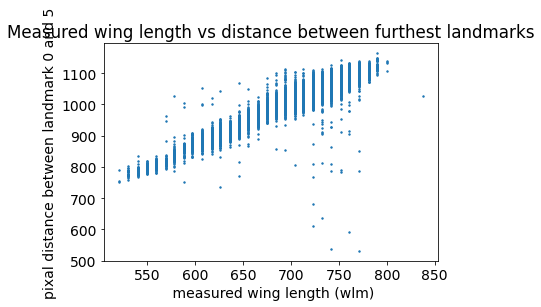

In [38]:
plt.scatter(x_lwm, y_lmr, s = 2)
plt.title("Measured wing length vs distance between furthest landmarks")
plt.xlabel(" measured wing length (wlm)")
plt.ylabel('pixal distance between landmark 0 and 5')
#plt.savefig("C:/Users/dylan/Work-Projects/msc_haar/manuscript1_exp/Pipeline/Results/Results_2021_03_28/winglengthplot.png")
plt.show()


/var/folders/y7/5z7ghqr16kn5c5c5jlcqnqrh0000gp/T/ipykernel_84861/1899500277.py:48: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


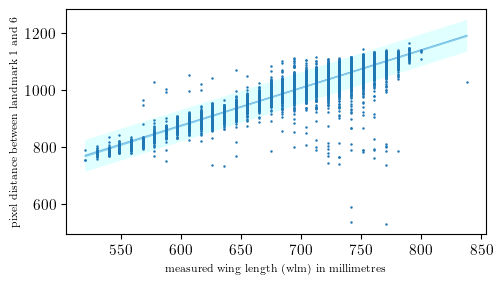

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

heights = np.array(x_lwm)

weights = np.array(y_lmr)

x = heights
y = weights

slope, intercept = np.polyfit(x, y, 1)  # linear model adjustment

y_model = np.polyval([slope, intercept], x)   # modeling...

x_mean = np.mean(x)
y_mean = np.mean(y)
n = x.size                        # number of samples
m = 2                             # number of parameters
dof = n - m                       # degrees of freedom
t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence

residual = y - y_model

std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

# calculating the r2
# https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
# Pearson's correlation coefficient
numerator = np.sum((x - x_mean)*(y - y_mean))
denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
correlation_coef = numerator / denominator
r2 = correlation_coef**2

# mean squared error
MSE = 1/n * np.sum( (y - y_model)**2 )

# to plot the adjusted model
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = np.polyval([slope, intercept], x_line)

# confidence interval
ci = t * std_error * (1/n + (x_line - x_mean)**2 / np.sum((x - x_mean)**2))**.5
# predicting interval
pi = t * std_error * (1 + 1/n + (x_line - x_mean)**2 / np.sum((x - x_mean)**2))**.5  

############### Ploting
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params) 

fig = plt.figure()
# width is 5.251 inches
# fig.set_size_inches(5.251,3.75) 
fig.set_size_inches(5.251,2.81) 

ax = fig.add_axes([.1, .1, .8, .8])

##, 'o', color = 'royalblue')
ax.plot(x_line, y_line, color = 'royalblue', linewidth=0.1)
ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval', linewidth=0.1)
ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval')
ax.scatter(x, y, s = 0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')

# rounding and position must be changed for each case and preference
a = str(np.round(intercept))
b = str(np.round(slope,2))
r2s = str(np.round(r2,2))
MSEs = str(np.round(MSE))

#ax.text(45, 110, 'y = ' + a + ' + ' + b + ' x')
#ax.text(45, 100, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)
#plt.title('Measured wing length vs distance between furthest landmarks',  fontsize=9)
plt.xlabel('measured wing length (wlm) in millimetres',  fontsize=8)
plt.ylabel('pixel distance between landmark 1 and 6',  fontsize=8)
plt.savefig('linear_reg.pdf',bbox_inches="tight", dpi=500)

In [7]:
# fit a stright line

from sklearn.linear_model import LinearRegression

x_lwm = np.array(x_lwm).reshape(-1,1)
y_lmr = np.array(y_lmr).reshape(-1,1)

linear_model = LinearRegression().fit(x_lwm, y_lmr)
 # R^2 score
print('reg score = {}'.format(linear_model.score(x_lwm,y_lmr)))

print('coeficients = x1{}'.format(linear_model.coef_[0]) )
print('c = {}'.format(linear_model.intercept_))

reg score = 0.8665714511642931
coeficients = x1[1.33321978]
c = [77.58114422]


In [8]:
# save all imges that are more than two standard deviations from the mean
from scipy.stats import sem
import math
# get all the errors

errors  = abs(linear_model.predict(x_lwm) - y_lmr)
print(np.std(errors))
print(np.std(errors)*2)
print(np.std(errors)*3)
print(np.std(errors)*4)


18.106603477043702
36.213206954087404
54.3198104311311
72.42641390817481


In [18]:
std_error

24.203995939344342

In [2]:
258/14277

0.01807102332422778

In [ ]:

#bin outliers images to examine
V20 = "F:/tsetse wings/V20rename/V20"
V21 = "F:/tsetse wings/V21rename/"
import random
from PIL import Image

for row in range(len(data)):
    csv = data
    if data.iloc[row,14] == '0' or data.iloc[row,13] == '0':
        if data.iloc[row,14] == '0':
            error = float(abs(linear_model.predict(data.wlm[row].reshape(-1,1)) - data.dis_r[row]))
            wing_side = 'R'
        elif data.iloc[row,13] == '0':
            wing_side = 'L'
            error = float(abs(linear_model.predict(data.wlm[row].reshape(-1,1)) - data.dis_l[row]))
        #choice = random.choice([0,1,2,3])

        if error < 2*std_error and choice == 0: #np.std(errors)*4:
            if int(str(csv.iloc[row,0])[:2]) == 20: 
                if (('V20P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V20 + '/page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))) and ('V20P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V20 + '/page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') )))):
                    
                    filename_ = 'V20P{}L{}{}.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:], wing_side)
          
                    if filename_ in os.listdir(V20 + '/page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') )):

                        im = Image.open(V20 + '/page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V20P{}L{}{}.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:], wing_side))

            elif int(str(csv.iloc[row,0])[:2]) == 21:
                if ('V21P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V21 + '/page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))) and ('V21P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))):
                    filename_ = 'V21P{}L{}{}.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:], wing_side)

                    if filename_ in os.listdir(V21 + '/page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') )):
                        im = Image.open(V21 + '/page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V21P{}L{}{}.bmp'.format(str                   (csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:],  wing_side))
                    
                    #im.show()
            if filename_[-5] == 'R':
                im = im.transpose(method=Image.FLIP_LEFT_RIGHT) 
            with torch.no_grad():
                im_L = TF.resize(im, (224,224))
                im_L = TF.to_tensor(im_L).cuda()
                im_L = TF.normalize(im_L, [0.5], [0.5])
                im_L = torch.reshape(im_L, (1, 3, 224, 224))
                predictionL = (network(im_L) + 0.5)
                predictionL = predictionL.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                predictionL = predictionL.cpu()
            #print(predictionL[0][:,0])
                plt.figure(figsize=(10,10))
                #print(im_L)
                plt.imshow(im)
                #plt.plot([int(predictionL[0][:,0][0]),int(predictionL[0][:,0][5])], [int(predictionL[0][:,1][0]),int(predictionL[0][:,1][5])] , linewidth=1.5 , color='aqua')
                plt.scatter(predictionL[0][:,0], predictionL[0][:,1], s=25, color ='lime')

                plt.axis('off')

                plt.savefig('C:/Projects/msc_haar/manuscript1_exp/Pipeline/Results/Results_2021_03_28/interest/{}.jpeg'.format(filename_[:-4]),  bbox_inches='tight', transparent=True, pad_inches=0)
                plt.close()

In [ ]:
# TODO:
#1. create a new csv with no corrections. 
#1. GET r^2 for each page
#2. Create a histogram of R^2
#3. check pages 

number_of_pages = 30
for i in range(number_of_pages): 
    print(type(data))
    print(type(data.iloc[i,0]))
    print(str(data.iloc[i,0])[2:6])#.lstrip("0"))
    #print(data[data.iloc[:,0][3:-3].lstrip("0")])
    #data_frame = data[data.iloc[:,0][3:-3].lstrip("0")]
    



In [4]:
# number of brocken wing tip image found
data = pd.read_csv("C:/Projects/msc_haar/manuscript1_exp/Pipeline/Results/Results_2021_03_28/final_clean.csv", index_col = 0)
#data = data[data.hc==0]
#data = data.reset_index(drop=True)
brocken_right = data[data['right_good'] == '1']
brocken_left = data[data['left_good'] == '1']
print(len(brocken_right) + len(brocken_left))

2299


In [5]:
len(data)

14608

In [6]:
2299/14608

0.15737951807228914

In [17]:
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params) 

fig = plt.figure()
# width is 5.251 inches
fig.set_size_inches(5.251,3.75) 

C:\Users\dylan\AppData\Local\Temp/ipykernel_25852/2995459255.py:1: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


<Figure size 378.072x270 with 0 Axes>

C:\Users\dylan\AppData\Local\Temp/ipykernel_25852/350112681.py:19: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


4.478133705561049e-05
9.5 pixel distance error


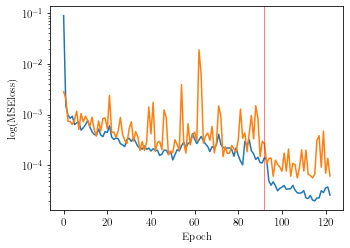

In [20]:
# ploting the epoch errors
import matplotlib.pyplot as plt
import pickle
import numpy as np
def flatten(t):
    return [item for sublist in t for item in sublist]
infile2 = open("C:/Projects/msc_haar/manuscript1_exp/regressors/training_losses/model_resnet50_regressor_NoTransf_trainingdata_1.pkl",'rb')
new_dict2 = pickle.load(infile2)
infile1 = open("C:/Projects/msc_haar/manuscript1_exp/regressors/training_losses/model_resnet50_regressor_NoTransf_trainingdata_0.pkl",'rb')
new_dict1 = pickle.load(infile1)
training =[]
training.append(new_dict1['train'][:new_dict1['val'].index(min(new_dict1['val']))])
training.append(new_dict2['train'][:30])
val = []
val.append(new_dict1['val'][:new_dict1['val'].index(min(new_dict1['val']))])
val.append(new_dict2['val'][:30])
training = flatten(training)
val = flatten(val)
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params) 

fig = plt.figure()
# width is 5.251 inches
fig.set_size_inches(5.251,3.75) 
plt.xlabel('Epoch')
plt.ylabel('log(MSEloss)')
plt.semilogy(training[:])
plt.semilogy(val[:])
plt.axvline(x=new_dict1['val'].index(min(new_dict1['val']))-1, color='r', linewidth=0.5)


#plt.plot(new_dict1['val'].index(min(new_dict1['val'])), val[107])
plt.plot()
print(min(new_dict2['val']))
plt.savefig('trainingloss_nofinetune.png')
print('9.5 pixel distance error')



C:\Users\dylan\AppData\Local\Temp/ipykernel_25852/2253789827.py:19: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


3.091469130595215e-05
8.3 pixel distance error


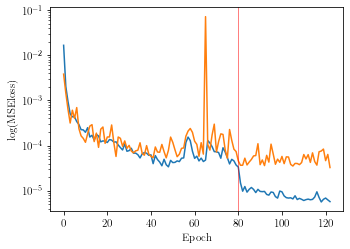

In [19]:
# ploting the epoch errors
import matplotlib.pyplot as plt
import pickle
import numpy as np
def flatten(t):
    return [item for sublist in t for item in sublist]
infile2 = open("C:/Projects/msc_haar/manuscript1_exp/regressors/training_losses/model_resnet50_regressor_finetune_NoTransf_trainingdata_1.pkl",'rb')
new_dict2 = pickle.load(infile2)
infile1 = open("C:/Projects/msc_haar/manuscript1_exp/regressors/training_losses/model_resnet50_regressor_finetune_NoTransf_trainingdata_0.pkl",'rb')
new_dict1 = pickle.load(infile1)
training =[]
training.append(new_dict1['train'][:new_dict1['val'].index(min(new_dict1['val']))])
training.append(new_dict2['train'][:new_dict2['val'].index(min(new_dict2['val']))-10])
val = []
val.append(new_dict1['val'][:new_dict1['val'].index(min(new_dict1['val']))])
val.append(new_dict2['val'][:new_dict2['val'].index(min(new_dict2['val']))-10])
training = flatten(training)
val = flatten(val)
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 12,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params) 

fig = plt.figure()
# width is 5.251 inches
fig.set_size_inches(5.251,3.75) 
plt.semilogy(training[:])
plt.semilogy(val[:])
plt.axvline(x=new_dict1['val'].index(min(new_dict1['val'])), color='r', linewidth=0.5)
plt.xlabel('Epoch')
plt.ylabel('log(MSEloss)')

#plt.plot(new_dict1['val'].index(min(new_dict1['val'])), val[107])
plt.plot()
print(min(new_dict2['val']))
plt.savefig('trainingloss_finetune.png')
print('8.3 pixel distance error')

In [49]:

import matplotlib
import matplotlib.offsetbox
from matplotlib.lines import Line2D
class AnchoredHScaleBar(matplotlib.offsetbox.AnchoredOffsetbox):
    """ size: length of bar in data units
        extent : height of bar ends in axes units """
    def __init__(self, size=1, extent = 0.03, label="", loc=2, ax=None,
                 pad=0.4, borderpad=0.5, ppad = 0, sep=2, prop=None, 
                 frameon=True, linekw={}, **kwargs):
        if not ax:
            ax = plt.gca()
        trans = ax.get_xaxis_transform()
        size_bar = matplotlib.offsetbox.AuxTransformBox(trans)
        line = Line2D([0,size],[0,0], **linekw)
        vline1 = Line2D([0,0],[-extent/2.,extent/2.], **linekw)
        vline2 = Line2D([size,size],[-extent/2.,extent/2.], **linekw)
        size_bar.add_artist(line)
        size_bar.add_artist(vline1)
        size_bar.add_artist(vline2)
        txt = matplotlib.offsetbox.TextArea(label, minimumdescent=False)
        self.vpac = matplotlib.offsetbox.VPacker(children=[size_bar,txt],  
                                 align="center", pad=ppad, sep=sep) 
        matplotlib.offsetbox.AnchoredOffsetbox.__init__(self, loc, pad=pad, 
                 borderpad=borderpad, child=self.vpac, prop=prop, frameon=frameon,
                 **kwargs)

C:\Users\dylan\AppData\Local\Temp/ipykernel_25852/2833067489.py:14: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


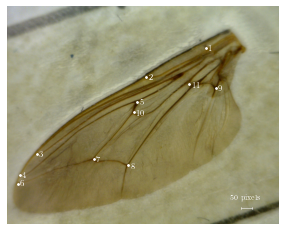

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Projects\msc_haar/tsetsedata_2019_left_commas/annotations_left.txt',index_col=0, header=None)
filename='A001 - 20170120_114456.jpg'
landmarks = []
for num in range(1, 23, 2):
    
    x_coordinate = df.loc[filename,num] - 1
    y_coordinate = df.loc[filename, num+1] - 1
    landmarks.append([x_coordinate, y_coordinate])
landmarks  = np.array(landmarks)
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params) 
image = plt.imread('C:/Projects/msc_haar/tsetsedata_2019_left_commas/images_left/A001 - 20170120_114456.jpg')
plt.scatter(landmarks[:,0], landmarks[:,1], s=3, color ='white')
for i in range(len(landmarks)):
    plt.annotate('{}'.format(i+1), (landmarks[i][0]+12,landmarks[i][1]+12), color='white', size=8)

#plt.annotate("jkljkdfs", (100, 100), color='white')
plt.annotate('50 pixels', (1050,910), color='white', size=7)

#line = matplotlib.lines.Line2D([800,800],[800,850], linewidth=10)
plt.plot([1100,1150],[950,950], color = 'white', linewidth=.5)
plt.plot([1100,1100],[945,955], color = 'white',  linewidth=0.5)
plt.plot([1150,1150],[945,955], color = 'white',  linewidth=0.5)
#plt.plot([1100,1150],[950,950], color = 'white')
#vline1 = Line2D([0,0],[-extent/2.,extent/2.], **linekw)
#vline2 = Line2D([size,size],[-extent/2.,extent/2.], **linekw)
plt.axis('off')
plt.imshow(image)

plt.savefig('landmark_plot.pdf', bbox_inches="tight", dpi=400)

plt.show()